In [1]:
%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np

## DFT in numpy
Let us consider a periodic function $u(x)$ in $[0,2\pi]$ and the value of $u(x)$ are known at $N$ collection points
\begin{equation}
    x_i = \frac{2\pi i}{N} \quad i=0,\dots,N-1
\end{equation}
In numpy, the Discrete Fourier Transform is implemented as 
\begin{equation}
       \begin{cases}
           \text{DFT}: \\
           \text{iDFT}:
       \end{cases}
\end{equation}
Using the interpolator:
\begin{equation}
    u_N(x) = \sum_{k=-N/2}^{N/2-1} \frac{\hat{u}_k}{N} e^{ikx}
\end{equation}
$\hat{u}_k$ is computed by DFT but we have two points to emphasize:
* The component with $k=-N/2$ must be removed as it has no intercounts and will make $u_N(x)$ non-real
* The order is not from $-N/2$ to $N/2-1$

|numpy  | 0   | 1 | $\dots$|$N/2-1$|$N/2$ |$N/2+1$ |$\dots$|$N/2+k$ |$\dots$| $N/2+N/2-1$ |
|:-----:|:---:|:-:|:-------|:-----:|:----:|:---:   |:-:    |:------:| :-----:|:---------:|
|k      | 0   |1  |$\dots$ |$N/2-1$|$-N/2$|$-N/2+1$|$\dots$|  $N/2$ |$\dots$|$-1$       |

For $k<0$ and $k \ne -N/2$
\begin{equation}
   \hat{u}_k e^{\frac{2\pi m i}{N}k} = \hat{u}[N+k]e^{\frac{2\pi m i}{N}(N+k)} = \hat{u}[N+k]e^{\frac{2\pi m i}{N}k}e^{\frac{2\pi m i}{N}N} = \hat{u}[N+k]e^{\frac{2\pi m i}{N}k}
\end{equation}
We also use $u(x) = e^{\sin x}$ as our example

If a function has a periodicity $L$ at grid point
\begin{equation}
    x^{'}_i = \frac{Li}{N}
\end{equation}

<IPython.core.display.Javascript object>


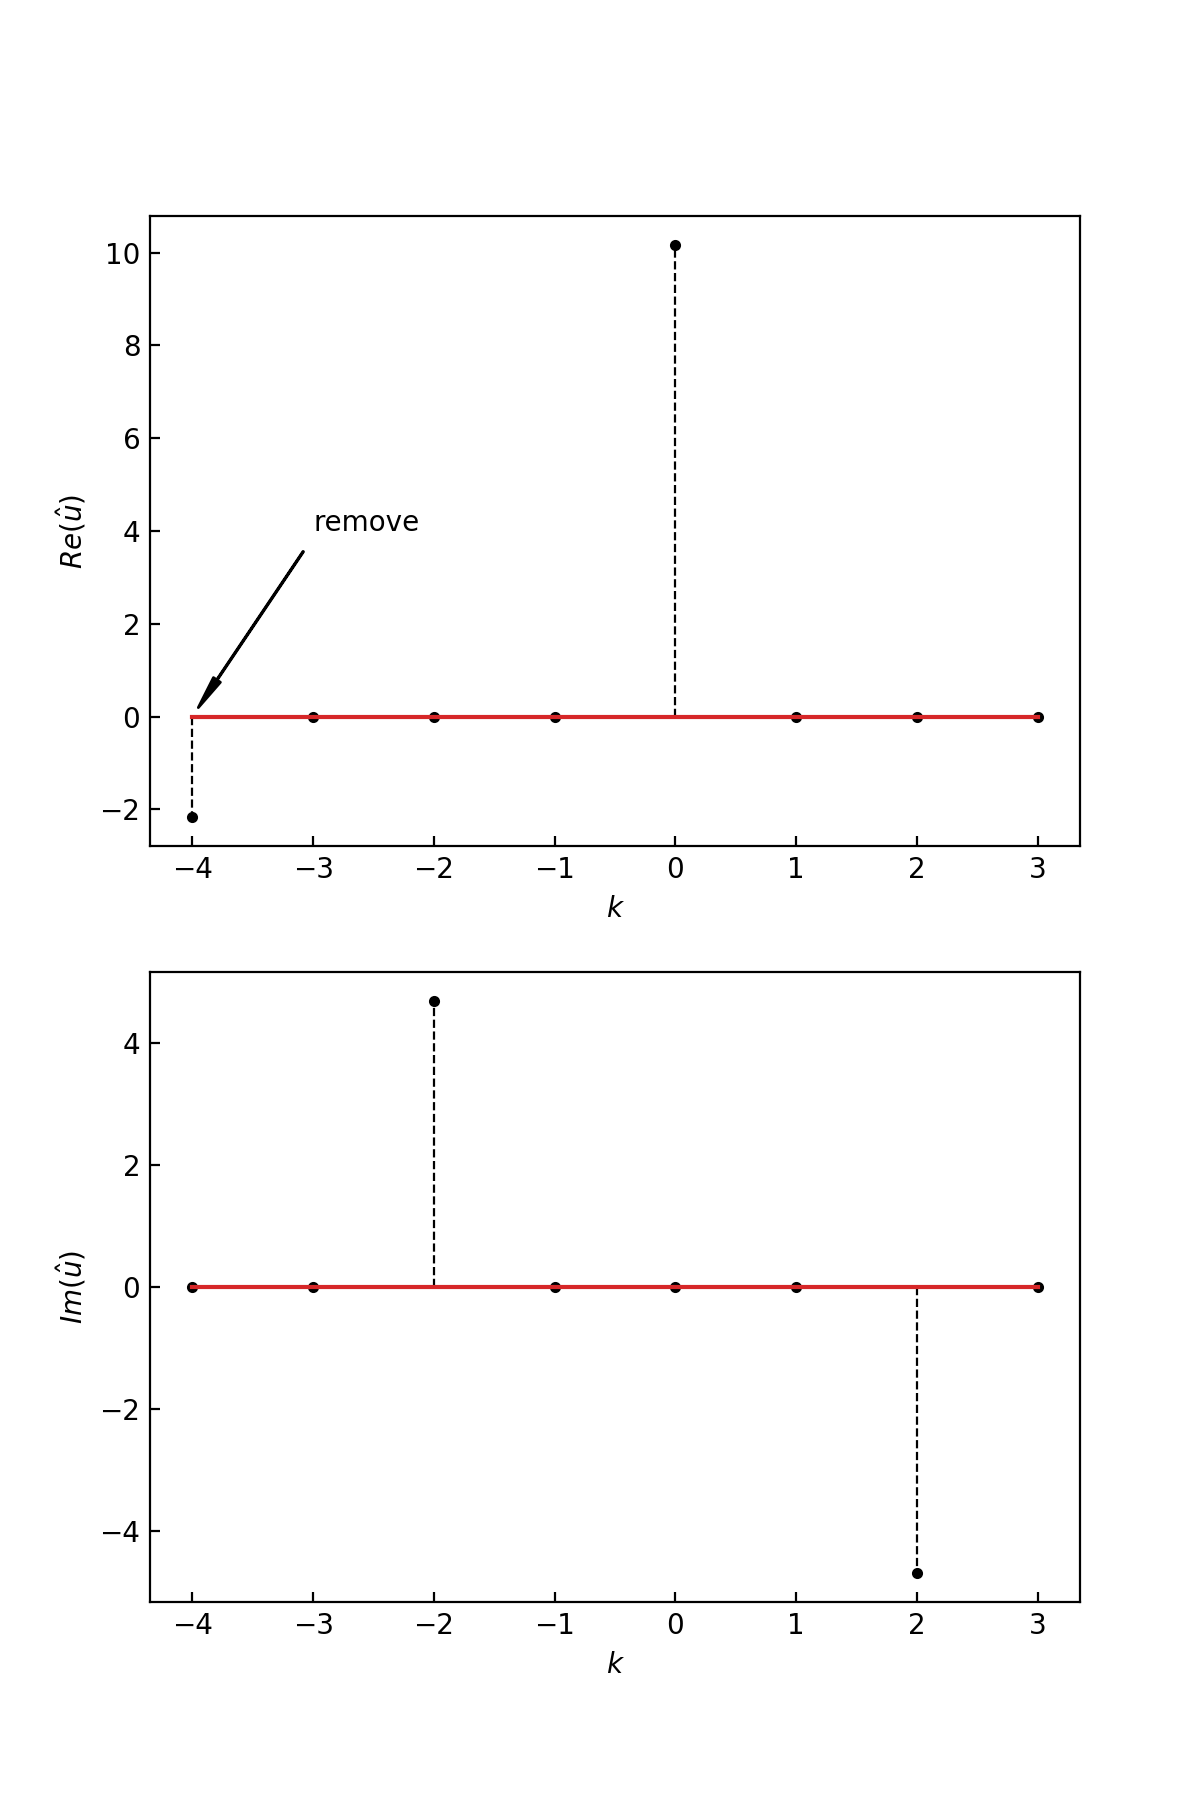

In [2]:
N = 8
x = np.linspace(0,2.*np.pi,N,endpoint=False)
u = np.exp(np.sin(2.*x)) 

# Perform the dft
wavenumber = np.fft.fftfreq(N)*N
uhat = np.fft.fft(u)

wavenumberplot = np.fft.fftshift(wavenumber)
uhatplot = np.fft.fftshift(uhat)

plt.figure(figsize=(6,9))

plt.subplot(211)
markerline, stemlines, baseline = plt.stem(wavenumberplot,uhatplot.real)
plt.setp(markerline,color='black',markersize=3.)
plt.setp(stemlines,color='black',linestyle='--',linewidth=0.8)
plt.tick_params(direction='in')
#plt.xlim(-4,4)
#plt.ylim(-0.2,1.3)
plt.annotate("remove",xy=[wavenumberplot[0],0.],xytext=[-3,4],
             arrowprops=dict(facecolor='black', 
                             shrink=0.05,
                             width=0.2,
                             headwidth=3.))
plt.xlabel('$k$')
plt.ylabel('$Re(\hat{u})$')

plt.subplot(212)
markerline, stemlines, baseline = plt.stem(wavenumberplot,uhatplot.imag)
plt.setp(stemlines,color='black',linestyle='--',linewidth=0.8)
plt.setp(markerline,color='black',markersize=3.)
plt.xlabel('$k$')
plt.ylabel('$Im(\hat{u})$')
#plt.xlim(-4,4)
#plt.ylim(-0.6,0.6)
plt.tick_params(direction='in')

In [5]:
# Compute the derivative
N = 512
Lx = 2.*np.pi
x = np.linspace(0,Lx,N,endpoint=False)
u = np.exp(np.sin(x))

k = np.fft.fftfreq(N)*N
uHat = np.fft.fft(u)
uxHat = 1.j*k*uHat
# Remove k = -N/2
uxHat[N//2] = 0.0+0.0j

ux = np.fft.ifft(uxHat)

<IPython.core.display.Javascript object>


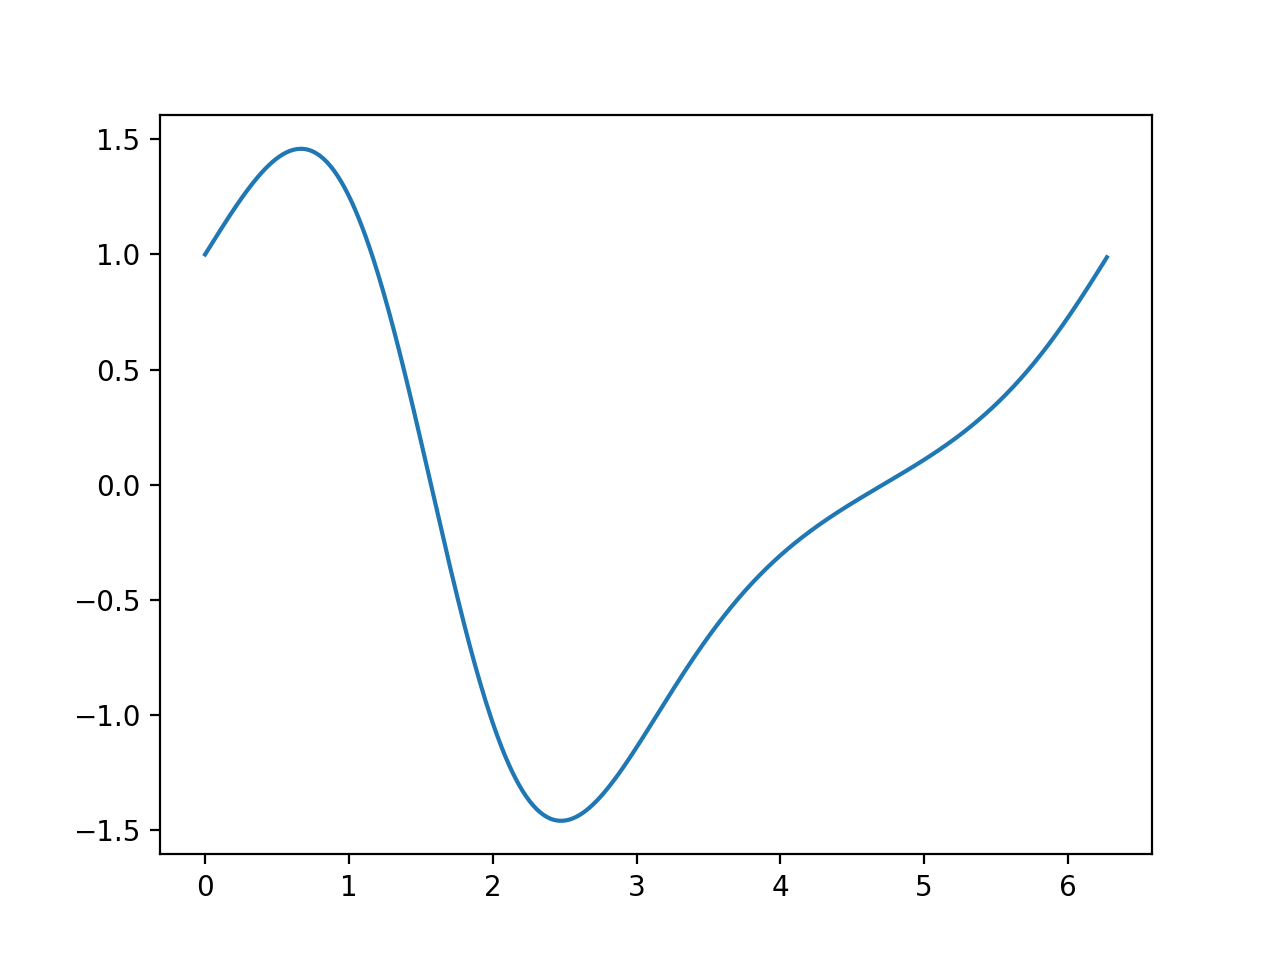

In [6]:
plt.figure()
plt.figure
plt.plot(x,ux)

In [17]:
# Compute the derivative
N = 16
alpha = 0.2
Lx = 2.*np.pi/alpha

x = np.linspace(0,Lx,N,endpoint=False)
u = np.exp(np.sin(x))

k = np.fft.fftfreq(N)*N*alpha
uHat = np.fft.fft(u)
uxHat = 1.j*k*uHat
# Remove k = -N/2
uxHat[N//2] = 0.0+0.0j

ux = np.fft.ifft(uxHat)

In [18]:
plt.figure()
plt.plot(x,ux)
plt.plot(x,np.cos(x)*u)

<IPython.core.display.Javascript object>